In [41]:
%matplotlib notebook

In [212]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import requests
import time
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from scipy import stats
import scipy

api_key = "51633da5ab8c54ec05396a059e8dc4a6"

In [213]:
vehicle_df = pd.read_csv("vehicle_data2.csv")
year = vehicle_df.iloc[:, 0]

In [214]:
vehicle_df["Year"]

vehicle_df.set_index('Year')

vehicle_df.columns

Index(['Year', 'Registered Vehicles', 'Miles traveled ', 'Fuel consumed',
       'Miles traveled per vehicle', 'Miles traveled per gallon',
       'Fuel consumed by vehicle '],
      dtype='object')

In [215]:
vehicle_df.head()

,Year,Registered Vehicles,Miles traveled,Fuel consumed,Miles traveled per vehicle,Miles traveled per gallon,Fuel consumed by vehicle
0,1960,73858,718762,57880,9.7,12.4,784
1,1965,90358,887812,71104,9.8,12.5,787
2,1970,111242,1109724,92329,10.0,12.0,830
3,1975,137913,1327664,108984,9.6,12.2,790
4,1980,161490,1527295,114960,9.5,13.3,712


# Number of Registered Vehicles Over Time

<IPython.core.display.Javascript object>


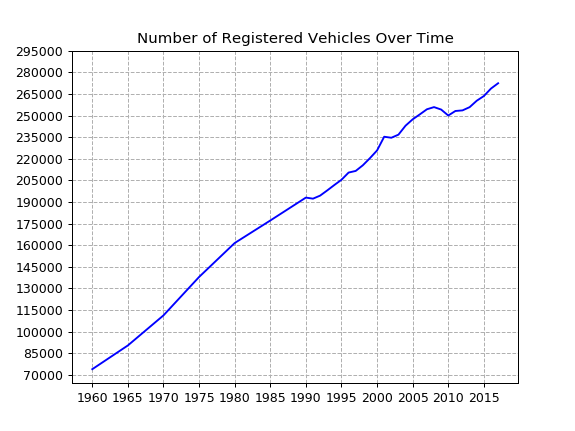

In [288]:
plt.figure()
plt.plot(vehicle_df["Year"], vehicle_df["Registered Vehicles"], color="blue", label="World Average" )
plt.yticks(list(np.arange(70000,300000,15000)))
plt.xticks(list(np.arange(1960,2017,5)))
plt.grid(linestyle='--')

plt.title("Number of Registered Vehicles Over Time")

plt.savefig("Images/registered_vehicles_over_time.png")

plt.show()

<IPython.core.display.Javascript object>


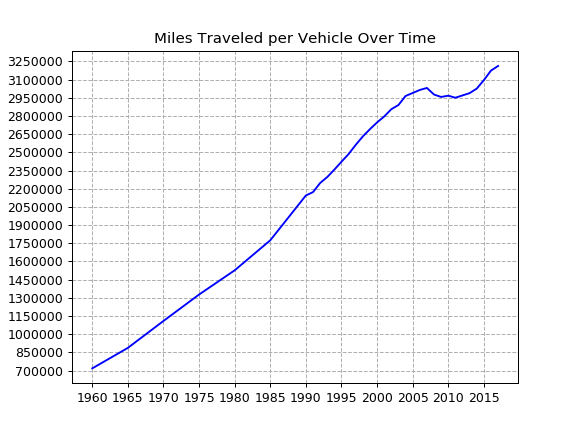

In [271]:
plt.figure()
plt.plot(vehicle_df["Year"], vehicle_df["Miles traveled "], color="blue", label="World Average" )
plt.yticks(list(np.arange(700000,3300000,150000)))
plt.xticks(list(np.arange(1960,2017,5)))
plt.grid(linestyle='--')

plt.title("Miles Traveled per Vehicle Over Time")
plt.savefig("Images/miles_traveled_over_time.png")

plt.show()

<IPython.core.display.Javascript object>


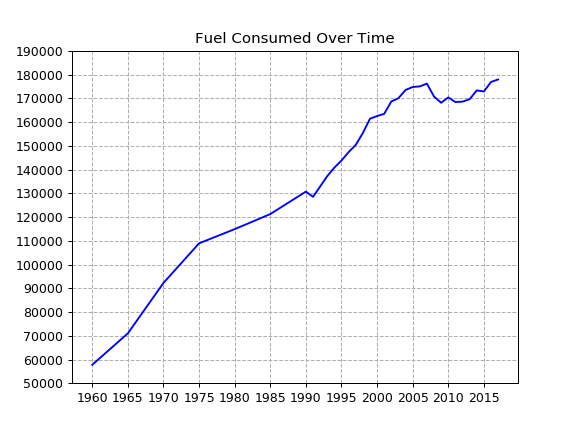

In [273]:
plt.figure()
plt.plot(vehicle_df["Year"], vehicle_df["Fuel consumed"], color="blue", label="World Average" )
plt.yticks(list(np.arange(50000,200000,10000)))
plt.xticks(list(np.arange(1960,2017,5)))
plt.grid(linestyle='--')

plt.title("Fuel Consumed Over Time")
plt.savefig("Images/fuel_consumed_over_time.png")

plt.show()

<IPython.core.display.Javascript object>


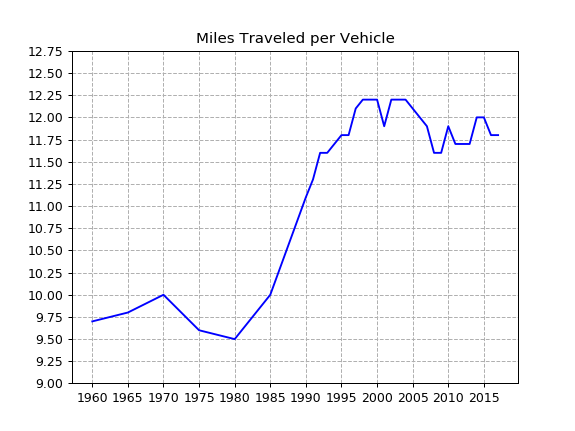

In [274]:
plt.figure()
plt.plot(vehicle_df["Year"], vehicle_df["Miles traveled per vehicle"], color="blue", label="World Average" )
plt.yticks(list(np.arange(9,13,.25)))
plt.xticks(list(np.arange(1960,2017,5)))
plt.grid(linestyle='--')

plt.title("Miles Traveled per Vehicle")
plt.savefig("Images/miles_traveled_per_vehicle.png")

plt.show()

Miles Traveled Per Gallon

<IPython.core.display.Javascript object>


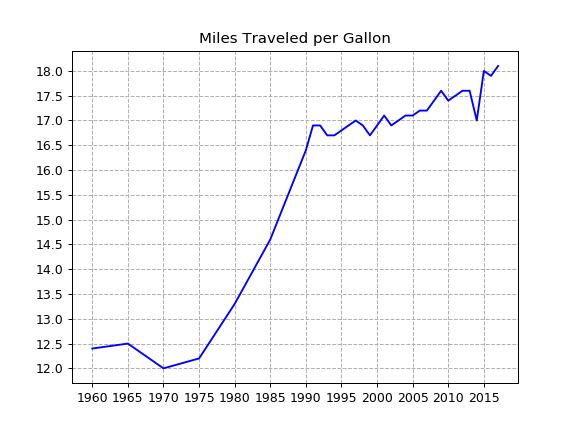

In [275]:
plt.figure(5)
plt.plot(vehicle_df["Year"], vehicle_df["Miles traveled per gallon"], color="blue", label="World Average" )
plt.yticks(list(np.arange(12,18.5,.5)))
plt.xticks(list(np.arange(1960,2017,5)))
plt.grid(linestyle='--')

plt.title("Miles Traveled per Gallon")
plt.savefig("Images/miles_traveled_per_gallon.png")
plt.show()

<IPython.core.display.Javascript object>


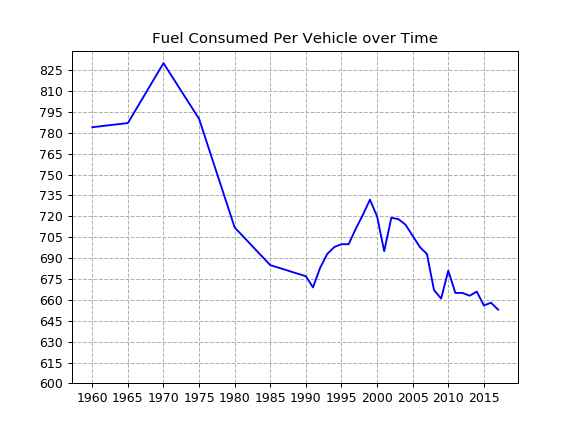

In [276]:
plt.figure()
plt.plot(vehicle_df["Year"], vehicle_df["Fuel consumed by vehicle "], color="blue", label="World Average" )
plt.yticks(list(np.arange(600,840,15)))
plt.xticks(list(np.arange(1960,2017,5)))
plt.grid(linestyle='--')

plt.title("Fuel Consumed Per Vehicle over Time")
plt.savefig("Images/fuelComsumption_over_time.png")

plt.show()


# U.S. Oil Consumption, Production, and Net Imports

<IPython.core.display.Javascript object>


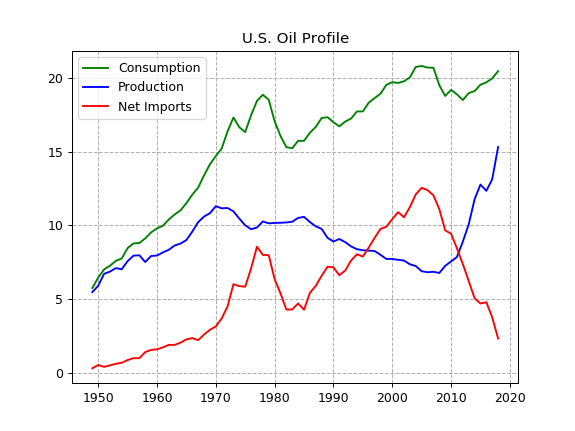

In [277]:
us_oil = pd.read_csv("us_oil_profile.csv")
oil_df = pd.DataFrame(data=us_oil)
oil_df.head()
oil_df.columns

plt.figure()

plt.plot(oil_df['Year'], oil_df["Consumption"], color="green", label="Consumption" )
plt.plot(oil_df['Year'], oil_df["Production"], color="blue" , label = "Production" )
plt.plot(oil_df['Year'], oil_df["Net Imports"], color="red",  label = "Net Imports")
plt.grid(linestyle='--')

plt.title("U.S. Oil Profile")
plt.legend(loc='best')
plt.show()
plt.savefig("Images/us_oil_profile.png")

# Oil Prices vs. HEV Sales 

In [144]:
url = "http://api.eia.gov/series/?"

query_url = f"{url}api_key=51633da5ab8c54ec05396a059e8dc4a6&series_id=SEDS.PAACD.CA.A"

oil_data = requests.get(query_url).json()
oil_data

oil_price = pd.read_csv("oil_price.csv")
df = oil_data['series'][0]['data']

oil_price.head()

,Year,Price,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,2017,20.85,NaN,NaN,NaN,NaN,NaN,2000,10.89
1,2016,18.50,NaN,NaN,NaN,NaN,NaN,2001,10.51
2,2015,21.75,NaN,NaN,NaN,NaN,NaN,2002,9.66
3,2014,27.83,NaN,NaN,NaN,NaN,NaN,2003,11.77
4,2013,28.92,NaN,NaN,NaN,NaN,NaN,2004,14.20


In [145]:
df = pd.DataFrame(data=oil_price)



df.rename(columns = {list(df)[0]: 'Year'}, inplace = True)
df.rename(columns = {list(df)[1]: 'Price'}, inplace = True)
df.sort_values("Year", ascending = True, inplace = True) 

df.head()

,Year,Price,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
17,2000,10.89,NaN,NaN,NaN,NaN,NaN,2017,20.85
16,2001,10.51,NaN,NaN,NaN,NaN,NaN,2016,18.50
15,2002,9.66,NaN,NaN,NaN,NaN,NaN,2015,21.75
14,2003,11.77,NaN,NaN,NaN,NaN,NaN,2014,27.83
13,2004,14.20,NaN,NaN,NaN,NaN,NaN,2013,28.92


<IPython.core.display.Javascript object>


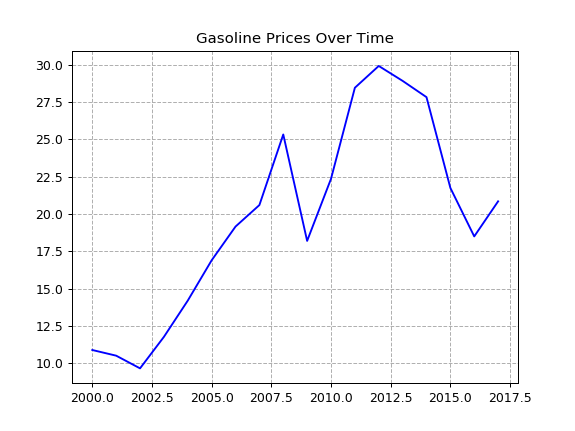

In [278]:

plt.figure()

plt.plot(df['Year'], df["Price"], color="blue", label="Gas prices over time" )
plt.grid(linestyle='--')

plt.title("Gasoline Prices Over Time")
plt.savefig("Images/gas_price_over_time.png")



plt.show()

In [147]:
hev_sales = pd.read_csv('hev_sales.csv')
pev_sales = pd.read_csv('pev_sales.csv')

hev_df = pd.DataFrame(data=hev_sales)
pev_df = pd.DataFrame(data=pev_sales)

hev_df.columns

Index(['Year', 'HEV Vehicle Sales '], dtype='object')

<IPython.core.display.Javascript object>


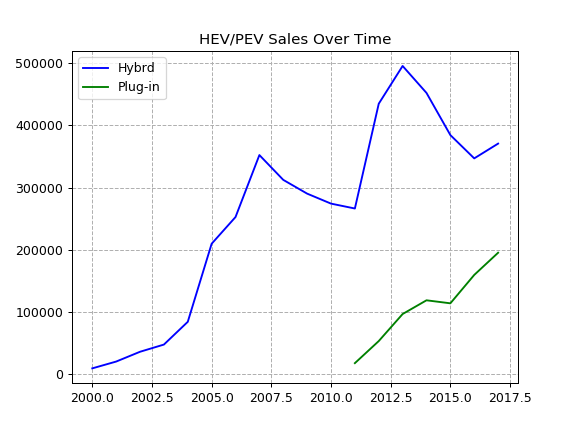

In [280]:
plt.figure()

plt.plot(hev_df['Year'], hev_df["HEV Vehicle Sales "], color="blue", label="Hybrd" )
plt.plot(pev_df['Year'], pev_df["PEV Sales"], color="green", label="Plug-in" )
plt.grid(linestyle='--')

plt.title("HEV/PEV Sales Over Time")
plt.legend(loc="best")
plt.savefig("Images/hpev_sales_over_time.png")
#plt.yticks(list(np.arange(5,30,5)))

#plt.xticks(np.arange(1970,2010,5), ('1970','1980','1990','2000','2010'))



plt.show()

In [232]:
#grabbing hev sales over time
year = hev_sales.iloc[:, 0]

hev_sales_per_year = hev_sales.iloc[:, 1]
hev_slope, hev_int, hev_r, hev_p, hev_std_err = stats.linregress(
    year, hev_sales_per_year)
hev_fit = hev_slope * year + hev_int

In [233]:
#grabbing gas sales over time
year = df.iloc[:, 0]

oil_sales_per_year = df.iloc[:, 1]
oil_slope, oil_int, oil_r, oil_p, oil_std_err = stats.linregress(
    year, oil_sales_per_year)
oil_fit = oil_slope * year + oil_int

In [240]:
#grabbing PEV sales over time 
p_year = pev_df.iloc[:, 0]

pev_sales_per_year = pev_df.iloc[:, 1]
pev_slope, pev_int, pev_r, pev_p, pev_std_err = stats.linregress(p_year, pev_sales_per_year)
pev_fit = pev_slope * p_year + pev_int

<IPython.core.display.Javascript object>


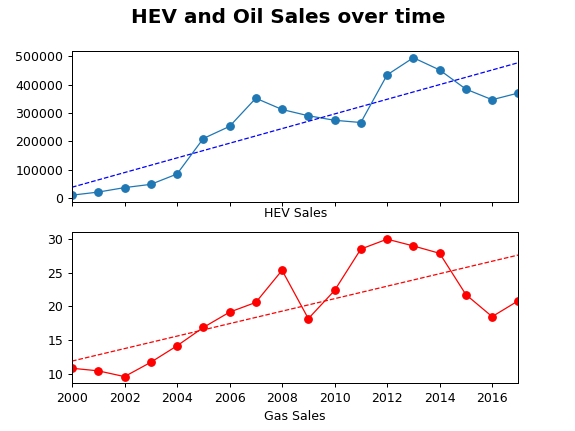

In [284]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle("HEV and Oil Sales over time", fontsize=16, fontweight="bold")


ax1.set_xlim(min(year), max(year))
ax1.plot(year, hev_sales_per_year, linewidth=1, marker="o")
ax1.plot(year, hev_fit, "b--", linewidth=1)
ax1.set_xlabel("HEV Sales")

ax2.plot(year, oil_sales_per_year, linewidth=1, marker="o", color="r")
ax2.plot(year, oil_fit, "r--", linewidth=1)
ax2.set_xlabel("Gas Sales")
fig.savefig("Images/gas_vs_hev_p_value.png")


In [65]:
x = oil_sales_per_year
y = hev_sales_per_year

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x,y)

p_value

9.388683723556552e-07

# EV and HEV Government Incentives Over time

In [166]:
ev_incentives = pd.read_csv("ev_incentives.csv")
inc_df = pd.DataFrame(data=ev_incentives)
inc_df.head()
inc_df.columns

Index(['Year', 'Electric Vehicles', 'Hybrid Electric Vehicles', 'Unnamed: 3',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18'],
      dtype='object')

<IPython.core.display.Javascript object>


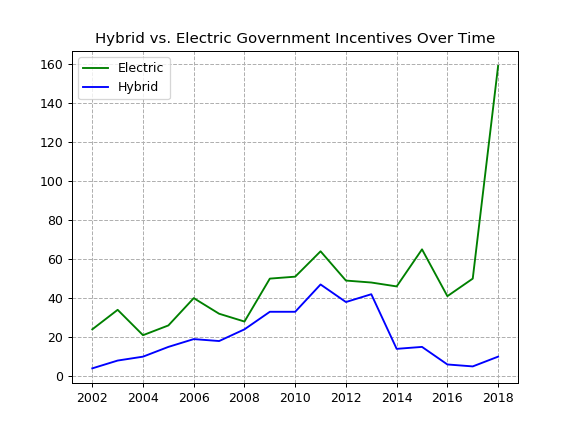

In [393]:
plt.figure()

plt.plot(inc_df['Year'], inc_df["Electric Vehicles"], color="green", label="Electric" )
plt.plot(inc_df['Year'], inc_df["Hybrid Electric Vehicles"], color="blue", label="Hybrid" )
plt.grid(linestyle='--')
plt.legend(loc="best")

plt.title("Hybrid vs. Electric Government Incentives Over Time")
plt.show()
plt.savefig("Images/government_incentives.png")

# Fuel Stations Over time 

In [205]:
fuel_stations = pd.read_csv("ev_fuel_stations_over_time.csv")
s_df = pd.DataFrame(data=fuel_stations)
s_df.head()
s_df.columns
s_df.dtypes

Year                          int64
# of EV Fueling Stations    float64
dtype: object

<IPython.core.display.Javascript object>


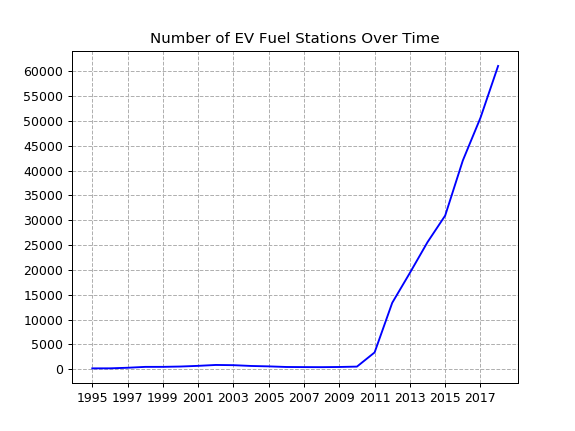

In [286]:
plt.figure()

plt.plot(s_df['Year'], s_df["# of EV Fueling Stations"], color="blue" )
plt.grid(linestyle='--')

plt.title("Number of EV Fuel Stations Over Time")
plt.xticks(list(np.arange(1995,2018,2)))
plt.yticks(list(np.arange(0,62000,5000)))
plt.savefig("Images/fuel_stations_vs_time.png")

plt.show()

In [387]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

ev_states = pd.read_csv("ev_count_by_stat.csv")
s_df = pd.DataFrame(data=ev_states)

C:\Users\Marcus\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


<IPython.core.display.Javascript object>


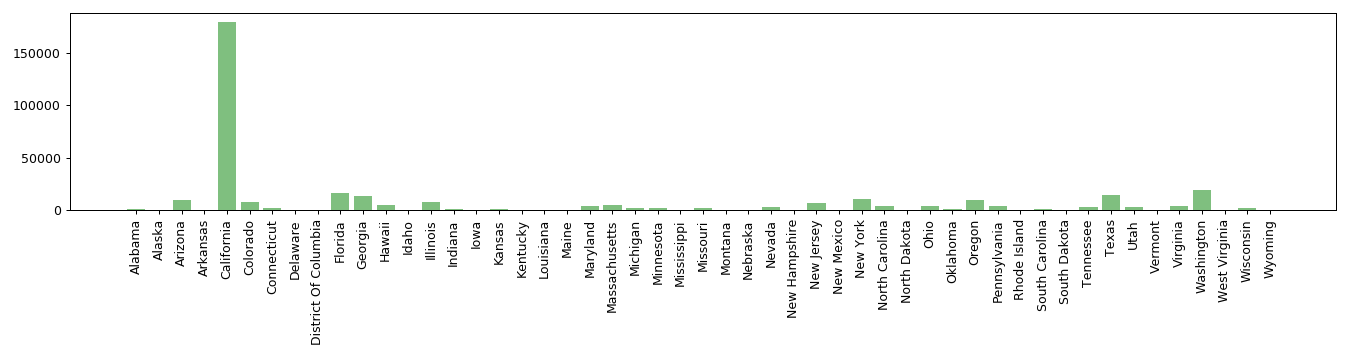

In [420]:
x_axis = np.arange(len(ev_states))
tick_locations = [value+0.4 for value in x_axis]

plt.figure(figsize=(15,4))
plt.bar(x_axis, ev_states["EV Count"], color='g', alpha=0.5, align="edge")
plt.xticks(tick_locations, ev_states["State"], rotation="vertical")
plt.savefig("Images/ev_count_per_state.png", bbox_inches="tight")
plt.tight_layout()


In [429]:
from census import Census
from configs import (c_key, g_key)
import gmaps
import numpy as np
import pandas as pd
import requests
import time
from us import states


# Census API Key
c = Census(c_key, year=2013)

county_ev = pd.read_csv("ev_county.csv")


In [430]:
gmaps.configure(api_key=g_key)
c_df = pd.DataFrame(data=county_ev)
locations = c_df[["Lat", "Lng"]].astype(float)
ev_count = c_df["PEV"].astype(float)

fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=ev_count, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 1)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))